In [ ]:
# This is day 2 Machine Learning
# as guided by Jason Brownlee's bk
# Data Preparation 


In [2]:
from  urllib.request import urlretrieve as retv
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv"
retv(url,"oil.csv")
url2 = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

In [ ]:
import pandas as pd

df = pd.read_csv("oil.csv",sep=",",header=None)
df.head()

In [ ]:
#the first thing is to look at the shape of the 
#dataset 

df.shape
#we have determined that it contains 50 features 
# 936 rows.

# we need to identify zero variance predictors
unique = df.nunique()
print(unique)

# Zero var predictors have a single value.
# we may remove them 
df.drop(unique[22], axis=1, inplace=True)
df.shape

In [ ]:
#It was a success Next we have to check
# on the columns with few values.
# a.k.a Near Zero Variance Predictors.

# Brownlees method is to check the % of unique values.
from numpy import unique
from numpy import loadtxt

# load the dataset
data = loadtxt('oil.csv', delimiter=",")

for i in range( data.shape[1]):
    num = len ( unique(data[:,i]))
    percentage = float(num)/ data.shape[0] * 100
    if percentage < 1:
        print('%d,  %d  %.1f%%'% ( i,num , percentage))
    
# we see that index 22 and 36 have less than 0.5 % of unique values
# we may drop them but reserve this for special relooking.

print(df.shape)

# get the numbe of unique values for each column
counts = df.nunique()

# record columns to delet
to_del = [ i for i, v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)

# drop the useless columns.
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

# I know that i Messed up somewhere
# and its because i had already deleted the 22nd column
# anw that's how its done.


Removing Columns That Have A Low Variance.


In [ ]:
from sklearn.feature_selection import VarianceThreshold
# we can load the dataset afresh
from pandas import read_csv

df = read_csv("Oil.csv", header=None)

# split the data into input and output
data = df.values
X = data[:, :-1]
y = data[:,-1]

print(X.shape,y.shape)

# # Define the transform
# transform = VarianceThreshold()

# # transfrom the input data
# X_sel = transform.fit_transform(X)
# print(X_sel.shape)

From above we can see that a column was removed.
we now have 48 features to work with.


In [ ]:
# we can also raise the threshold to 1.

# transform = VarianceThreshold(1)
# X_sel = transform.fit_transform(X)
# print(X_sel.shape)
# 19 features were droped.
# but below is Brownlees code.

In [ ]:
from numpy import arange
from sklearn.feature_selection import VarianceThreshold
# define the thresholds to check.

thresholds = arange(0.0, 0.55, 0.05)

# apply transform with each threshold.
print(thresholds.shape)
results = list()

for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    
    # transform the input data
    X_sel = transform.fit_transform(X)
    
    # determine the number of input features
    n_features = X_sel.shape[1]
    
    print('>Threshold= %.2f, Feature=%d' % ( t, n_features))
    # store the result
    results.append(n_features)
    
    # plot the threshold vs the number of selected features.
    from matplotlib import pyplot as plt
    
    plt.plot(thresholds, results)
    plt.show()

(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


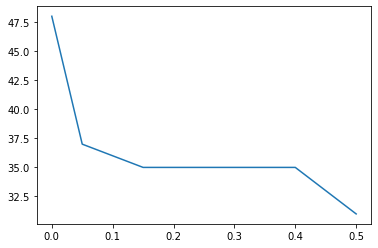

In [1]:
# Brownlees code.
# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

# load the dataset
df = read_csv('Oil.csv', header=None)
# split data into inputs and outputs

data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)

# apply transform with each threshold
results = list()

for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
    # plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()


##### Identifying Rows That Contain Duplicate Data.

In [28]:
from pandas import read_csv
retv(url2,'iris.csv')
# loading the dataset.
df = read_csv('iris.csv', header=None)
df.head()



,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
# To identify duplicates we use: duplicate()
dups = df.duplicated()

# Does dups have any duplicates.
print("Dups returned:  {} ".format(dups.any()))


Dups returned:  True 


In [30]:
# Okey now print the values.
# since dups returns true false values
# it can be passed into the df with positions.

print(df[dups])


       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


In [31]:
#Brown's approach
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
(147, 5)


In [27]:
# These Values Need To be Deleted.
print(df.shape)

# My approach.
df.drop(df[dups], axis=0, inplace=True)
print(df.shape)

# with my approach 5 variables were removed.
# This is implies that 2 rows have been lost.
# A way around this....still thinking.



(150, 5)
(145, 5)


In [32]:
# That marked the end of todays tutorial.
# Now I'm heading to Zindi to test out the skill
# check out what i've done on zindi under Data-Man.